<a href="https://colab.research.google.com/github/GECarlo/CodingDojo/blob/main/Regression_Metrics_Exercise_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# mount drive
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
# import libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [3]:
# import file
filename = '/content/drive/MyDrive/Colab Notebooks/Boston_Housing_from_Sklearn.csv'
df = pd.read_csv(filename)
df.head()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


**data dictionary for this data set:**

          CRIM     per capita crime rate by town

          NOX      nitric oxides concentration (parts per 10 million)

          RM       average number of rooms per dwelling

          AGE      proportion of owner-occupied units built prior to 1940

          PTRATIO  pupil-teacher ratio by town

          LSTAT    % lower economic status of the population

          PRICE   Median value of owner-occupied homes in $1000's

predict the PRICE based on the available features using a linear regression model.

1) Make a heatmap of the correlations.  Identify any features that have a correlation coefficient of magnitude 0.5 (could be + or -) or greater with price.   We will limit our analysis to these three features.

2) Select columns for your feature matrix (X) and select PRICE for your target vector (y).

3) Split your data into train and test groups. Please use random number 42 for consistency!

4) Instantiate your model and fit it on the training set.

5) Evaluate your model performance using R^2 on the training set and on the test set.  Is there a difference between model performance on the training data vs the test data?

6) Evaluate your model using mean absolute error (MAE).

7) Evaluate your model using mean squared error (MSE).  

8) Evaluate your model performance using RMSE on the training set and on the test set. This metric is useful because the units will be in the same units as your target vector. In this case 1,000 of dollars.  

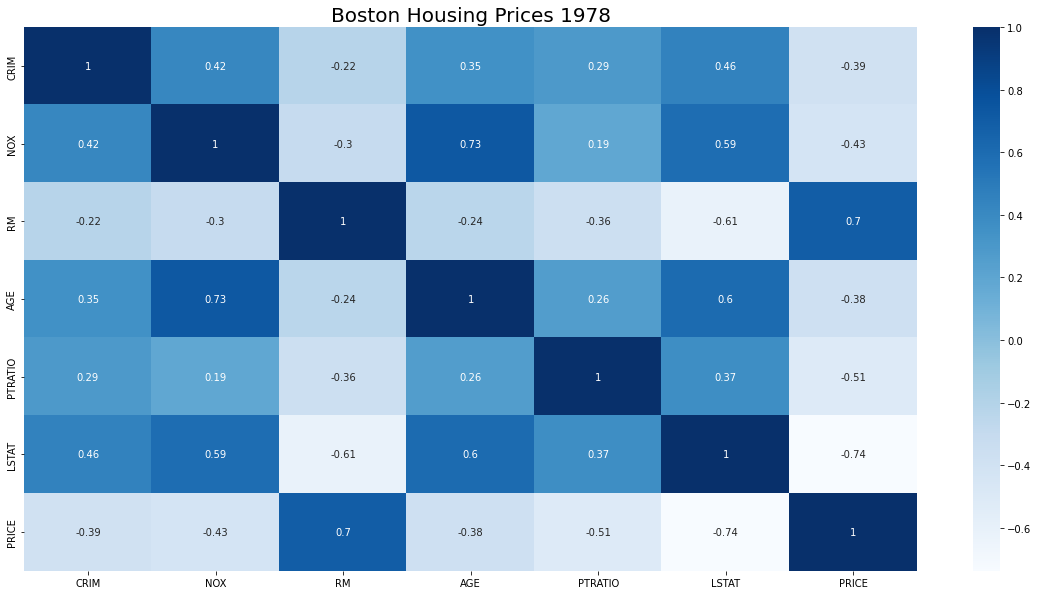

In [4]:
# Make a heatmap of the correlations. 
# Identify any features that have a correlation coefficient of magnitude 0.5 (could be + or -) or greater with price. 
# We will limit our analysis to these three features.
corr = df.corr()
plt.figure(figsize = (20, 10))
plt.title('Boston Housing Prices 1978', fontsize = 20)
sns.heatmap(corr, cmap = 'Blues', annot = True);

# there is a strong negative correlation between LSTAT and Price -0.74
# there is a strong correlation between RM and Price 0.70
# there is a moderate negative correlation between PTRATIO and Price -0.51

In [5]:
# Select columns for your feature matrix (X) and select PRICE for your target vector (y).
# target y Price
y = df['PRICE']

# features RM, PTRATIO, LSTAT
X = df[['RM', 'PTRATIO', 'LSTAT']]

# Split your data into train and test groups. Please use random number 42 for consistency!
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [6]:
# create numerical selector
num_selector = make_column_selector(dtype_include = 'number')

In [7]:
# instatiate transformers
scaler = StandardScaler()

# create pipeline for numercial data
num_pipe = make_pipeline(scaler)

In [8]:
# create numercial tuple
num_tuple = (num_pipe, num_selector)

In [9]:
# instantitate column transformer
col_transformer = make_column_transformer(num_tuple, remainder = 'drop')

In [10]:
# Instantiate your model and fit it on the training set.
col_transformer.fit(X_train)

ColumnTransformer(transformers=[('pipeline',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f0fad53d490>)])

In [11]:
#  Evaluate your model performance using R^2 on the training set and on the test set.
X_train_transformed = col_transformer.transform(X_train)
X_test_transformed = col_transformer.transform(X_test)

In [12]:
# Instatiate regression model
reg = LinearRegression()

In [13]:
# train the model on training data
# fit the model on the training data
reg.fit(X_train_transformed, y_train)

LinearRegression()

In [14]:
# evaluate the training model
trained_score = reg.score(X_train_transformed, y_train)
print(trained_score)

0.6877966145058925


In [16]:
# evaluate the test data
tested_score = reg.score(X_test_transformed, y_test)  
print(tested_score)

# this suggests that the model is not as good as it should as it is only 63.31% on a 100% r2 scale

0.6331590458194676


In [28]:
# get the predictions of the training set
train_preds = reg.predict(X_train_transformed)

# get the predictions of the test set
test_preds = reg.predict(X_test_transformed)

In [33]:
# Evaluate your model performance using R^2 on the training set and on the test set.
# Is there a difference between model performance on the training data vs the test data?
# yes there is a varaince of 7.9% between the train results and the test results based on the R2 score

In [37]:
# 6) Evaluate your model using mean absolute error (MAE).
mae_train = mean_absolute_error(y_train, train_preds)
print(mae_train)

3.714054057158005


In [38]:
# there is a variance of 9.4% between the training set and the test set using MAE
# the predicted MAE score on the test set is 3.39 which is far from 0.0 hence this model is not accurate
mae_test = mean_absolute_error(y_test, test_preds)
print(mae_test)

3.3918448293813976


In [40]:
# 7) Evaluate your model using mean squared error (MSE)
mse_train = mean_squared_error(y_train, train_preds)
print(mse_train)

27.68673681796949


In [39]:
# there is a variance of 7% between the training set and the test set using MAE
mse_test = mean_squared_error(y_test, test_preds)
print(mse_test)

25.688824196675963


In [42]:
# 8) Evaluate your model performance using RMSE on the training set and on the test set.
rmse_train = np.sqrt(mse_train)
print(rmse_train)

5.261818774717492


In [43]:
# there is a variance of 3.9% between the training set and the test set using RMSE
rmse_test = np.sqrt(mse_test)
print(rmse_test)

5.0684143671049595



# This metric is useful because the units will be in the same units as your target vector. 
# In this case 1,000 of dollars.